In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [2]:
pip install rapidfuzz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.0 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import rapidfuzz
from rapidfuzz import process, utils as fuzz_utils

## The EDA Section

Importing the candidate information data from FiveThirtyEight, creating the first two visualizations.

In [5]:
url1 = "https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/dem_candidates.csv"
url2 = "https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/rep_candidates.csv"

In [8]:
dem_candidates = pd.read_csv(url1,sep=',')
dem_candidates.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
rep_candidates = pd.read_csv(url2,sep=',', encoding = "latin-1")

In [ ]:
win_df1 = dem_candidates.loc[(dem_candidates["Primary Status"] == "Advanced") & (dem_candidates["Primary Runoff Status"] == "None")]
win_df2 = dem_candidates.loc[(dem_candidates["Primary Status"] == "Advanced") & (dem_candidates["Primary Runoff Status"] == "Advanced")]
win_df = pd.concat([win_df1,win_df2])
win_df["Final Election Result"] = ["Won"] * 239
lost_df1 = dem_candidates.loc[(dem_candidates["Primary Status"] == "Lost") & (dem_candidates["Primary Runoff Status"] == "None")]
lost_df2 = dem_candidates.loc[(dem_candidates["Primary Status"] == "Advanced") & (dem_candidates["Primary Runoff Status"] == "Lost")]
lost_df = pd.concat([lost_df1,lost_df2])
lost_df["Final Election Result"] = ["Lost"] * 564
dem_candidates_result = pd.concat([win_df, lost_df])
dem_original_with_results = dem_candidates_result.copy()

In [ ]:
#replicate the same process for rep_candidates
win_df1 = rep_candidates.loc[(rep_candidates["Primary Status"] == "Advanced") & (rep_candidates["Primary Runoff Status"] == "None")]
win_df2 = rep_candidates.loc[(rep_candidates["Primary Status"] == "Advanced") & (rep_candidates["Primary Runoff Status"] == "Advanced")]
win_df = pd.concat([win_df1,win_df2])
win_df["Final Election Result"] = ["Won"] * win_df.shape[0]
lost_df1 = rep_candidates.loc[(rep_candidates["Primary Status"] == "Lost") & (rep_candidates["Primary Runoff Status"] == "None")]
lost_df2 = rep_candidates.loc[(rep_candidates["Primary Status"] == "Advanced") & (rep_candidates["Primary Runoff Status"] == "Lost")]
lost_df = pd.concat([lost_df1,lost_df2])
lost_df["Final Election Result"] = ["Lost"] * lost_df.shape[0]
rep_candidates_result = pd.concat([win_df, lost_df])
rep_original_with_results = rep_candidates_result.copy()

In [ ]:
cols = ['Race','Veteran?', 'LGBTQ?', 'STEM?','Party Support?', 'Emily Endorsed?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?','Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?','WFP Endorsed?', 'VoteVets Endorsed?','Final Election Result']


In [ ]:
dem_candidates_result = dem_candidates_result[cols]

In [ ]:
endorsement = dem_candidates_result.iloc[: ,4:15].copy()
endorsement = endorsement.fillna("No")

In [ ]:
endorsement_no_count = []
for i in range(11):
  endorsement_no_count.append(sum(endorsement.iloc[:,i] == "No"))

In [ ]:
endorsement_yes_count = []
for i in range(11):
  endorsement_yes_count.append(sum(endorsement.iloc[:,i] == "Yes"))

In [ ]:
endorsement_percent_yes = []
for i in range(11):
  temp = endorsement_yes_count[i]
  endorsement_percent_yes.append(float(temp/803 * 100))

In [ ]:
endorse_col = endorsement.columns
endorse_percent_df = pd.DataFrame({
    "Type of Endorsement" : endorse_col,
    "Endorsement Yes Percent": np.round(endorsement_percent_yes,1)
})
endorse_percent_df = endorse_percent_df.sort_values("Endorsement Yes Percent")

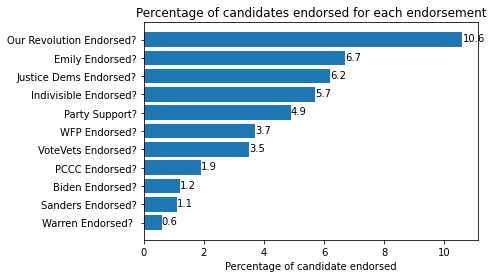

In [ ]:
# First Visualization "Percentage of candidates endorsed for each endorsement"
fig, ax = plt.subplots()
bars = ax.barh(y = endorse_percent_df['Type of Endorsement'], width = endorse_percent_df['Endorsement Yes Percent'])
for i, v in enumerate(endorse_percent_df['Endorsement Yes Percent']):
    ax.text(v, i-0.1, str(v), color='black', fontdict=dict(fontsize=10))
plt.xlabel("Percentage of candidate endorsed")
plt.title("Percentage of candidates endorsed for each endorsement");

In [ ]:
plot_2_df = dem_candidates_result[['Race', 'Veteran?', 'LGBTQ?', 'STEM?','Final Election Result']]
# drop rows with Null values for identities
plot_2_df = plot_2_df.dropna()

In [ ]:
white_won = len(plot_2_df[(plot_2_df['Race']=='White')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['Race']=='White'])
nonwhite_won = len(plot_2_df[(plot_2_df['Race']=='Nonwhite')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['Race']=='Nonwhite'])
veteran_won = len(plot_2_df[(plot_2_df['Veteran?']=='Yes')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['Veteran?']=='Yes'])
not_veteran_won =len(plot_2_df[(plot_2_df['Veteran?']=='No')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['Veteran?']=='No'])
lgbtq_won = len(plot_2_df[(plot_2_df['LGBTQ?']=='Yes')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['LGBTQ?']=='Yes'])
not_lgbtq_won = len(plot_2_df[(plot_2_df['LGBTQ?']=='No')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['LGBTQ?']=='No'])
stem_won = len(plot_2_df[(plot_2_df['STEM?']=='Yes')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['STEM?']=='Yes'])
not_stem_won = len(plot_2_df[(plot_2_df['STEM?']=='No')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['STEM?']=='No'])

In [ ]:
identity = np.array(['white', 'nonwhite', 'veteran', 'not_veteran', 'LGBTQ', 'not_LGBTQ', 'STEM', 'not_STEM'])
prop_won = np.array([white_won, nonwhite_won, veteran_won, not_veteran_won, lgbtq_won, not_lgbtq_won, stem_won, not_stem_won])
identity_percent_df = pd.DataFrame({
    "Identity Type" : identity,
    "Percent Won": np.round(prop_won*100,1)
})
identity_percent_df = identity_percent_df.sort_values("Percent Won")

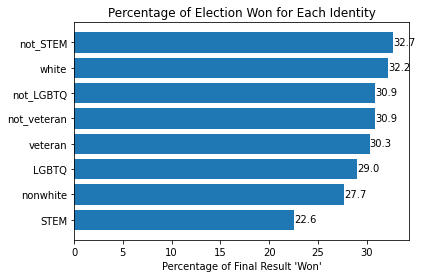

In [ ]:
# Second Visualization "Percentage of Election Won for Each Identity"
fig, ax = plt.subplots()
bars = ax.barh(y = identity_percent_df['Identity Type'], width = identity_percent_df['Percent Won'])
for i, v in enumerate(identity_percent_df['Percent Won']):
    ax.text(v, i-0.1, str(v), color='black', fontdict=dict(fontsize=10))
plt.xlabel("Percentage of Final Result 'Won'")
plt.title("Percentage of Election Won for Each Identity");

Importing the disbursement data, cleaning, and generating the rest of the visualizations.

In [ ]:
disbursement = pd.read_csv("/content/drive/MyDrive/data 102/candidate_summary_2018.csv")

Merge disbursement & rep_candidates, & dem_original_with_results. Columns shared are: Cand_name, candidate.

1. Lower case all name, replace the commas in Cand_name with space
2. match on similarity > 86, preserving all disbursement columns, Final Election Result
3. Using a for loop to check the unmatched if both their first and last names are uniquely contained by an entry in disbursement

In [ ]:
dem_original_with_results['Candidate'] = dem_original_with_results['Candidate'].str.lower()
rep_candidates['Candidate'] = rep_candidates['Candidate'].str.lower()

In [ ]:
disbursement['Cand_Name'] = disbursement['Cand_Name'].str.lower()
disbursement['Cand_Name'] = disbursement['Cand_Name'].str.replace(',', '')

In [ ]:
out_disbursement = disbursement.copy()

In [ ]:
#UP TO DATE VERSION! feature engineering version: Do not consider middle name
last_name, first_name = [], []
for lst in disbursement['Cand_Name'].str.split(" "):
    last_name.append(lst[0])
    first_name.append(lst[1])
res = []
for i in range(len(last_name)):
    res.append(first_name[i] + " " + last_name[i])

In [ ]:
disbursement['Cand_Name'] = res

In [ ]:
dem_disbursement = disbursement[disbursement["Cand_Party_Affiliation"] == "DEM"]
dem_disbursement = dem_disbursement[['Cand_Name', 'Total_Receipt', 'Total_Disbursement', 'Exempt_Legal_Accounting_Disbursement', 'Fundraising_Disbursement', 'Other_Disbursements']]
dem_disbursement = dem_disbursement.reset_index().drop("index", axis = 1)

In [ ]:
rep_disbursement = disbursement[disbursement["Cand_Party_Affiliation"] == "REP"]
rep_disbursement = rep_disbursement[['Cand_Name', 'Total_Receipt', 'Total_Disbursement', 'Exempt_Legal_Accounting_Disbursement', 'Fundraising_Disbursement', 'Other_Disbursements']]
rep_disbursement = rep_disbursement.reset_index().drop("index", axis = 1)

In [ ]:
def fuzzy_merge(baseFrame, compareFrame, baseKey, compareKey, threshold=86, limit=1, how='left'):
    s_mapping = {x: fuzz_utils.default_process(x) for x in compareFrame[compareKey]}

    m1 = baseFrame[baseKey].apply(lambda x: process.extract(
      fuzz_utils.default_process(x), s_mapping, limit=limit, score_cutoff=threshold, processor=None
    ))
    baseFrame['Match'] = m1

    m2 = baseFrame['Match'].apply(lambda x: ', '.join(i[2] for i in x))
    baseFrame['organisations'] = m2.replace("",np.nan)

    return baseFrame.merge(compareFrame, left_on='organisations', right_on=compareKey, how=how)

In [ ]:
# check accuracy
output_dem = fuzzy_merge(dem_original_with_results, dem_disbursement, 'Candidate', 'Cand_Name')
output_dem[['Candidate', 'Match', 'Cand_Name']].head(5)

,Candidate,Match,Cand_Name
0,walt maddox,[],NaN
1,robert kennedy jr.,"[(robert kennedy, 95.0, robert kennedy)]",robert kennedy
2,robert kennedy jr.,"[(robert kennedy, 95.0, robert kennedy)]",robert kennedy
3,tabitha isner,"[(tabitha isner, 100.0, tabitha isner)]",tabitha isner
4,mallory hagan,"[(mallory hagan, 100.0, mallory hagan)]",mallory hagan


In [ ]:
outliers_idx = output_dem[output_dem['Cand_Name'].isna()]['Candidate'].index
total = 0
columns = ['Cand_Name', 'Total_Receipt', 'Total_Disbursement', 'Exempt_Legal_Accounting_Disbursement',
           'Fundraising_Disbursement', 'Other_Disbursements']
for outliers_idx in outliers_idx:
    name = output_dem[output_dem['Cand_Name'].isna()]['Candidate'][outliers_idx]
    lst = name.split(' ')
    temp = out_disbursement[out_disbursement['Cand_Name'].str.contains(lst[-1])]
    temp2 = temp[temp['Cand_Name'].str.contains(lst[0])]
    if temp2.shape[0] == 1:
        total += 1
        for column in columns:
            output_dem.at[outliers_idx, column] = temp2[column]
total

<ipython-input-33-fbd3748a3a9a>:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  temp = out_disbursement[out_disbursement['Cand_Name'].str.contains(lst[-1])]


69

In [ ]:
# FIXME: rep_original_with_results instead of rep_disbursement
output_rep = fuzzy_merge(rep_candidates, rep_disbursement, 'Candidate', 'Cand_Name')
output_rep[['Candidate', 'Match', 'Cand_Name']].head(10)

,Candidate,Match,Cand_Name
0,mike dunleavy,[],NaN
1,michael sheldon,[],NaN
2,mead treadwell,[],NaN
3,darin colbry,[],NaN
4,thomas gordon,[],NaN
5,merica hlatcu,[],NaN
6,gerald heikes,[],NaN
7,steve smith,"[(steve smith, 100.0, steve smith)]",steve smith
8,wendy rogers,"[(wendy rogers, 100.0, wendy rogers)]",wendy rogers
9,tiffany shedd,"[(tiffany shedd, 100.0, tiffany shedd)]",tiffany shedd


In [ ]:
outliers_idx = output_rep[output_rep['Cand_Name'].isna()].index
total = 0
columns = ['Cand_Name', 'Total_Receipt', 'Total_Disbursement', 'Exempt_Legal_Accounting_Disbursement',
           'Fundraising_Disbursement', 'Other_Disbursements']
for outliers_idx in outliers_idx:
    name = output_rep[output_rep['Cand_Name'].isna()]['Candidate'][outliers_idx]
    lst = name.split(' ')
    temp = out_disbursement[out_disbursement['Cand_Name'].str.contains(lst[-1])]
    temp2 = temp[temp['Cand_Name'].str.contains(lst[0])]
    if temp2.shape[0] == 1:
        total += 1
        for column in columns:
            output_rep.at[outliers_idx, column] = temp2[column]
total

<ipython-input-35-7536ee324470>:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  temp = out_disbursement[out_disbursement['Cand_Name'].str.contains(lst[-1])]


60

In [ ]:
#check cell: proportion of null values
print('Dem proportion of null values: '+str(output_dem['Cand_Name'].isna().sum() / output_dem.shape[0]))
print('Rep proportion of null values: '+str(output_rep['Cand_Name'].isna().sum() / output_rep.shape[0]))

Dem proportion of null values: 0.17326732673267325
Rep proportion of null values: 0.20152091254752852


In [ ]:
print('Dem total samples: '+str((output_dem.shape[0]) - output_dem['Cand_Name'].isna().sum()))
print('Rep total samples: '+str((output_rep.shape[0]) - output_rep['Cand_Name'].isna().sum()))

Dem total samples: 668
Rep total samples: 630


In [ ]:
output_dem = output_dem[~output_dem['Cand_Name'].isna()]
output_rep = output_rep[~output_rep['Cand_Name'].isna()]

In [ ]:
# replace final election result with 1 for won and 0 for lost.
dem_candidates_result.replace({"Yes": 1, "No": 0})
dem_candidates_result['Final Election Result'] = dem_candidates_result['Final Election Result'].replace({"Won": 1, "Lost": 0})

In [ ]:
lst = ['Race','Veteran?', 'LGBTQ?', 'STEM?','Party Support?', 'Emily Endorsed?', 'Biden Endorsed?', 'Warren Endorsed? ', 'Guns Sense Candidate?', 'Elected Official?','Obama Alum?',
       'Sanders Endorsed?', 'Our Revolution Endorsed?','Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?','WFP Endorsed?', 'VoteVets Endorsed?','Final Election Result']

output_dem[lst] = output_dem[lst].fillna('No')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
output_dem[['General Status']] = output_dem[['General Status']].fillna('None')

In [ ]:
output_dem.drop(columns = ['No Labels Support?', 'organisations', 'Primary %', 'Won Primary', 'Match'], inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
#when we feature engineered the final election result, two rows are missing (630 - 628)
win_df1 = output_rep.loc[(output_rep["Primary Status"] == "Advanced") & (output_rep["Primary Runoff Status"] == "None")]
win_df2 = output_rep.loc[(output_rep["Primary Status"] == "Advanced") & (output_rep["Primary Runoff Status"] == "Advanced")]
win_df = pd.concat([win_df1,win_df2])
win_df["Final Election Result"] = ['Won'] * win_df.shape[0]
lost_df1 = output_rep.loc[(output_rep["Primary Status"] == "Lost") & (output_rep["Primary Runoff Status"] == "None")]
lost_df2 = output_rep.loc[(output_rep["Primary Status"] == "Advanced") & (output_rep["Primary Runoff Status"] == "Lost")]
lost_df = pd.concat([lost_df1,lost_df2])
lost_df["Final Election Result"] = ['Lost'] * lost_df.shape[0]
output_rep = pd.concat([win_df, lost_df])
output_rep.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,No Labels Support?,Match,organisations,Cand_Name,Total_Receipt,Total_Disbursement,Exempt_Legal_Accounting_Disbursement,Fundraising_Disbursement,Other_Disbursements,Final Election Result
8,wendy rogers,AZ,U.S. House Arizona District 1,Representative,Regular,8/28/18,Advanced,None,On the Ballot,43.40,...,NaN,"[(wendy rogers, 100.0, wendy rogers)]",wendy rogers,wendy rogers,1423836.68,1427124.40,0.0,0.0,0.0,Won
10,lea marquez peterson,AZ,U.S. House Arizona District 2,Representative,Regular,8/28/18,Advanced,None,On the Ballot,33.60,...,NaN,"[(peterson marquez, 95.0, peterson marquez)]",peterson marquez,peterson marquez,1466445.23,1457230.95,0.0,0.0,0.0,Won
16,nicolas pierson,AZ,U.S. House Arizona District 3,Representative,Regular,8/28/18,Advanced,None,On the Ballot,51.40,...,NaN,[],NaN,"154 pierson joe nicolas Name: Cand_Name, dt...",77401.00,71640.50,0.0,0.0,0.0,Won
17,debbie lesko,AZ,U.S. House Arizona District 8,Representative,Special,2/27/18,Advanced,None,On the Ballot,35.77,...,NaN,"[(debbie lesko, 100.0, debbie lesko)]",debbie lesko,debbie lesko,2103473.83,2032633.16,0.0,0.0,6002.8,Won
30,steve ferrara,AZ,U.S. House Arizona District 9,Representative,Regular,8/28/18,Advanced,None,On the Ballot,58.90,...,NaN,"[(steve ferrara, 100.0, steve ferrara)]",steve ferrara,steve ferrara,1565927.76,1565927.76,0.0,0.0,0.0,Won


In [ ]:
lst = ['Rep Party Support?', 'Trump Endorsed?', 'Bannon Endorsed?', 'Great America Endorsed?',
       'NRA Endorsed?', 'Right to Life Endorsed?',
       'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?', 'Koch Support?',
       'House Freedom Support?', 'Tea Party Endorsed?', 'Main Street Endorsed?',
       'Chamber Endorsed?']
for ele in lst:
    output_rep[ele] = output_rep[ele].fillna('No')

In [ ]:
output_rep[['General Status']] = output_rep[['General Status']].fillna('None')

In [ ]:
lst = []
for i in range(output_dem.shape[0]):
  lst.append('dem')
output_dem['political_affiliation'] = lst

lst = []
for i in range(output_rep.shape[0]):
  lst.append('rep')
output_rep['political_affiliation'] = lst

In [ ]:
col = ['Candidate', 'Total_Receipt', 'Total_Disbursement','Exempt_Legal_Accounting_Disbursement', 'Fundraising_Disbursement','Other_Disbursements',
       'State', 'Final Election Result', 'political_affiliation']

vis_dem = output_dem[col]
vis_rep = output_rep[col]

In [ ]:
# concatenating the two dataframes
match = pd.concat([output_dem, output_rep], ignore_index=True)

In [ ]:
median = np.median(match['Total_Disbursement'].values)
q3 = np.percentile(match['Total_Disbursement'].values, 75)
q1 = np.percentile(match['Total_Disbursement'].values, 25)
threshold = q3 + 1.5 * (q3 - q1)
no_outlier = match[match['Total_Disbursement'] < threshold]

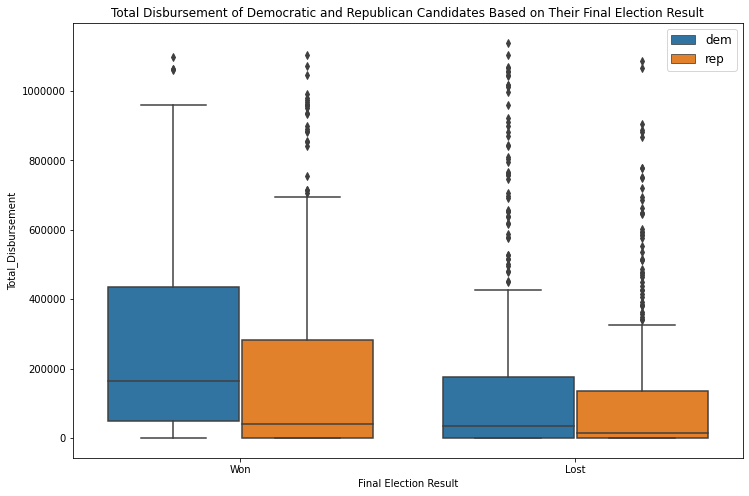

In [ ]:
# The third visualization on
# "Total Disbursement of Democratic and Republican Candidates Based on Their Final Election Result"
plt.figure(figsize=(12,8));
plt.ticklabel_format(style='plain');
sns.boxplot(data = no_outlier, x = 'Final Election Result', y = 'Total_Disbursement', hue = 'political_affiliation');
plt.legend(loc="upper right", frameon=True, fontsize=12);
plt.title('Total Disbursement of Democratic and Republican Candidates Based on Their Final Election Result');

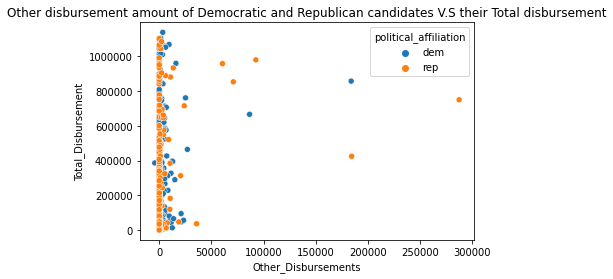

In [ ]:
# Fourth visualization:
#"Other disbursement amount of Democratic and Republican candidates V.S their Total disbursement"
plt.figure(figsize=(6,4));
plt.ticklabel_format(style='plain');
sns.scatterplot(data = no_outlier, x ='Other_Disbursements', y= 'Total_Disbursement', hue = 'political_affiliation');
plt.title('Other disbursement amount of Democratic and Republican candidates V.S their Total disbursement');

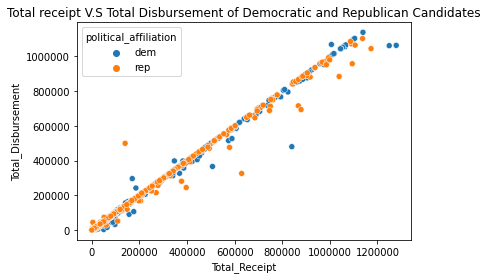

In [ ]:
# Fifth visualization:
#"Total receipt V.S Total Disbursement of Democratic and Republican Candidates"
plt.figure(figsize=(6,4));
plt.ticklabel_format(style='plain');
sns.scatterplot(data = no_outlier, x ='Total_Receipt', y= 'Total_Disbursement', hue = 'political_affiliation');
plt.title('Total receipt V.S Total Disbursement of Democratic and Republican Candidates');

In [ ]:
output_rep.drop(columns = ['No Labels Support?', 'organisations', 'Primary %', 'Won Primary', 'Match'], inplace = True)

## Research Question 1

In [ ]:
!pip install pymc3
import pymc3 as pm
from pymc3 import glm
import statsmodels.api as sm
import arviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 872 kB 4.4 MB/s 
     |████████████████████████████████| 1.8 MB 48.1 MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=a6457e4b8d29307aa42be413ae055d67c83170def1e149bc0c1812081041aa36
  Stored in directory: /root/.cache/pip/wheels/0e/41/d2/82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc


In [ ]:
dem_candidates_result = dem_candidates_result.fillna("No")
dem_candidates_result = dem_candidates_result.replace({"Yes": 1, "No": 0})
dem_candidates_result = dem_candidates_result.replace({"White": 1, "Nonwhite": 0})
dem_candidates_result = dem_candidates_result.replace({"Won": 1, "Lost": 0})

In [ ]:
cols = ['Race', 'Veteran', 'LGBTQ', 'STEM', 'PartySupport',
       'EmilyEndorsed', 'BidenEndorsed', 'WarrenEndorsed',
       'SandersEndorsed', 'OurRevolutionEndorsed',
       'JusticeDemsEndorsed', 'PCCCEndorsed', 'IndivisibleEndorsed',
       'WFPEndorsed', 'VoteVetsEndorsed', 'FinalElectionResult']
dem_candidates_result.columns = cols

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dem_candidates_result, test_size=0.2, random_state=200)
X_cols = ['Race', 'Veteran', 'LGBTQ', 'STEM', 'PartySupport',
       'EmilyEndorsed', 'BidenEndorsed', 'WarrenEndorsed',
       'SandersEndorsed', 'OurRevolutionEndorsed',
       'JusticeDemsEndorsed', 'PCCCEndorsed', 'IndivisibleEndorsed',
       'WFPEndorsed', 'VoteVetsEndorsed']
y_col = ["FinalElectionResult"]

X = train[X_cols]
y = train[y_col]

GLM

In [ ]:
# build GLM model
import statsmodels.api as sm

reg = sm.GLM.from_formula('FinalElectionResult ~ Race + Veteran + LGBTQ + STEM + PartySupport + EmilyEndorsed + BidenEndorsed + WarrenEndorsed + SandersEndorsed + OurRevolutionEndorsed + JusticeDemsEndorsed + PCCCEndorsed + IndivisibleEndorsed + WFPEndorsed + VoteVetsEndorsed',data = train, family=sm.families.Binomial()).fit()

print(reg.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     FinalElectionResult   No. Observations:                  642
Model:                             GLM   Df Residuals:                      626
Model Family:                 Binomial   Df Model:                           15
Link Function:                   logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -334.49
Date:                 Tue, 13 Dec 2022   Deviance:                       668.97
Time:                         02:00:29   Pearson chi2:                     638.
No. Iterations:                     22                                         
Covariance Type:             nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept           

In [ ]:
train["y_pred"] = reg.predict(train)
train["y_pred"] = np.round(train["y_pred"]).astype(int)
test["y_pred"] = reg.predict(test)
test["y_pred"] = np.round(test["y_pred"]).astype(int)

In [ ]:
train_rmse = np.mean((train["y_pred"] - train["FinalElectionResult"]) ** 2) ** 0.5
test_rmse = np.mean((test["y_pred"] - test["FinalElectionResult"]) ** 2) ** 0.5
print("Training set error for GLM model:", train_rmse)
print("Test set error for GLM model:", test_rmse)

Training set error for GLM model: 0.48175432267321716
Test set error for GLM model: 0.4662524041201569


In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(train["FinalElectionResult"],train["y_pred"])
test_accuracy = accuracy_score(test["FinalElectionResult"],test["y_pred"])
print("Training set Accuracy for GLM model:", train_accuracy)
print("Test set Accuracy for GLM model:", test_accuracy)

Training set Accuracy for GLM model: 0.7679127725856698
Test set Accuracy for GLM model: 0.782608695652174


In [ ]:
equation = 'FinalElectionResult ~ Race + Veteran + LGBTQ + STEM + PartySupport + EmilyEndorsed + BidenEndorsed + WarrenEndorsed + SandersEndorsed + OurRevolutionEndorsed + JusticeDemsEndorsed + PCCCEndorsed + IndivisibleEndorsed + WFPEndorsed + VoteVetsEndorsed'
with pm.Model() as model:
    glm.GLM.from_formula(equation,data = train, family=glm.families.Binomial())
    train_trace = pm.sample(1000,cores=2, target_accept=0.95, return_inferencedata=True)

We recommend to instead use Bambi https://bambinos.github.io/bambi/


ERROR:pymc3:There were 929 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 885 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f386b5040>,
      dtype=object)

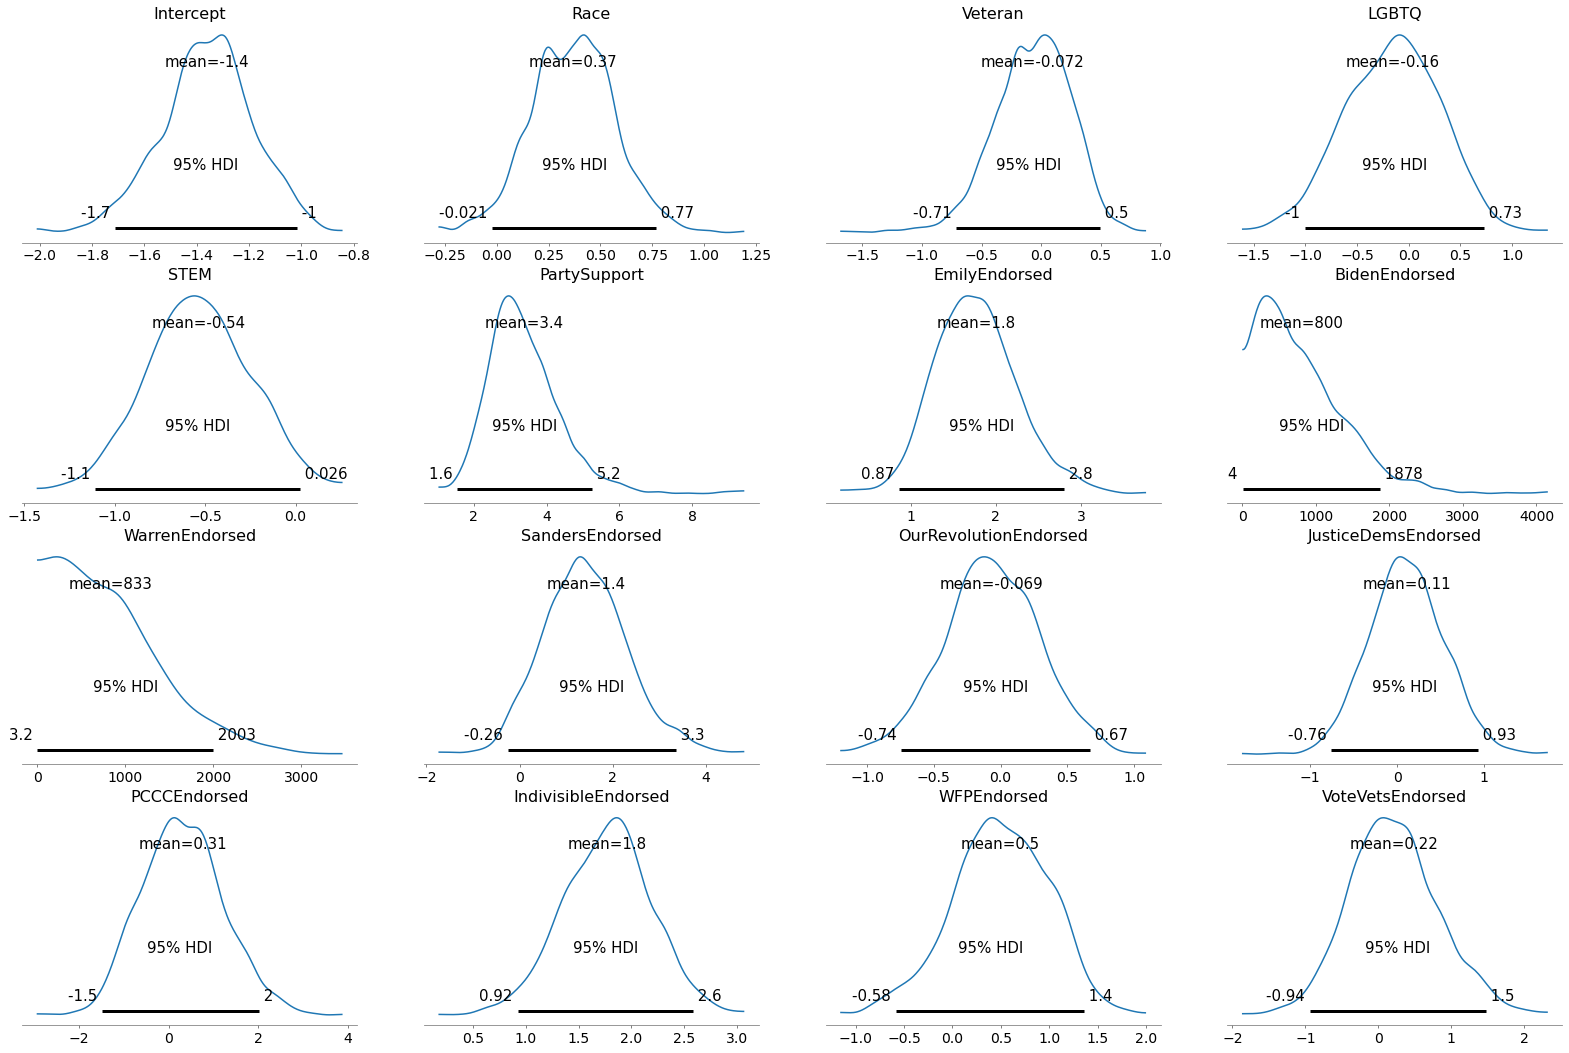

In [ ]:
arviz.plot_posterior(train_trace,hdi_prob=0.95)

In [ ]:
ppc_test = pm.sample_posterior_predictive(train_trace, model=model, samples=100)
ppc_test

y_test_pred = np.round(ppc_test["y"].mean(axis=0)).astype(int)
np.mean((y_test_pred - train["FinalElectionResult"]) ** 2) ** 0.5

/usr/local/lib/python3.8/dist-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


0.4833682445228318

In [ ]:
y_test_pred = np.round(ppc_test["y"].mean(axis=0)).astype(int)
accuracy_score(train["FinalElectionResult"],y_test_pred)

0.7663551401869159

Nonparametric Method - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_cols = ['Race', 'Veteran', 'LGBTQ', 'STEM', 'PartySupport',
       'EmilyEndorsed', 'BidenEndorsed', 'WarrenEndorsed',
       'SandersEndorsed', 'OurRevolutionEndorsed',
       'JusticeDemsEndorsed', 'PCCCEndorsed', 'IndivisibleEndorsed',
       'WFPEndorsed', 'VoteVetsEndorsed']
y_col = ["FinalElectionResult"]



X = train[X_cols]
y = train[y_col]
rf =  RandomForestClassifier().fit(X, y)

train_X = train[X_cols]
train_y = rf.predict(train_X)
train['y_pred'] = train_y

test_X = test[X_cols]
test_y = rf.predict(test_X)
test['y_pred'] = test_y

train_rmse = np.mean((train["y_pred"] - train["FinalElectionResult"]) ** 2) ** 0.5
test_rmse = np.mean((test["y_pred"] - test["FinalElectionResult"]) ** 2) ** 0.5

print("Training set error for Random Forest model:", train_rmse)
print("Test set error for Random Forest model:    ", test_rmse)

<ipython-input-66-28fc00e25d80>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf =  RandomForestClassifier().fit(X, y)


Training set error for Random Forest model: 0.4517187667528992
Test set error for Random Forest model:     0.47286624374346037


In [ ]:
train_accuracy = accuracy_score(train["FinalElectionResult"],train_y)
test_accuracy = accuracy_score(test["FinalElectionResult"],test_y)
print("Training set Accuracy for Random Forest model:", train_accuracy)
print("Test set Accuracy for Random Forest model:    ", test_accuracy)

Training set Accuracy for Random Forest model: 0.7959501557632399
Test set Accuracy for Random Forest model:     0.7763975155279503


## Research Question 2

Setting up the treatment for causal inference.

In [ ]:
percent_won_dem = sum(output_dem['Final Election Result'] == 'Won') / len(output_dem['Final Election Result'])
percent_won_rep = sum(output_rep['Final Election Result'] == 'Won') / len(output_rep['Final Election Result'])
[percent_won_dem, percent_won_rep]

[0.3023952095808383, 0.34394904458598724]

In [ ]:
treatment_threshold_dem = output_dem['Total_Disbursement'].quantile(1 - percent_won_dem)

In [ ]:
treatment_threshold_rep = output_rep['Total_Disbursement'].quantile(1 - percent_won_rep)

In [ ]:
output_dem['treated'] = output_dem['Total_Disbursement'] >= treatment_threshold_dem
output_rep['treated'] = output_rep['Total_Disbursement'] >= treatment_threshold_rep

### Republican Dataset

In [ ]:
rep_columns = output_rep.columns[9:22].to_list()

In [ ]:
for column in rep_columns:
    output_rep[column] = output_rep[column].replace({'Yes': 1, 'No': 0})
rep_columns_final = rep_columns + ['State', 'Office Type']

In [ ]:
rep_final = output_rep[rep_columns_final]
rep_final = pd.get_dummies(rep_final)
rep_final['treated'] = output_rep['treated']
rep_final['Final Election Result'] = output_rep['Final Election Result'].replace({'Won': 1, 'Lost': 0})

In [ ]:
rep_final.columns[0:60]

Index(['Rep Party Support?', 'Trump Endorsed?', 'Bannon Endorsed?',
       'Great America Endorsed?', 'NRA Endorsed?', 'Right to Life Endorsed?',
       'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
       'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
       'Main Street Endorsed?', 'Chamber Endorsed?', 'State_AZ', 'State_CA',
       'State_CO', 'State_CT', 'State_DE', 'State_FL', 'State_GA', 'State_HI',
       'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY',
       'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO',
       'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NH', 'State_NJ',
       'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR',
       'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX',
       'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV',
       'Office Type_Governor', 'Office Type_Representative',
       'Office Type_Sena

Setting up the logistic regression to calculate the propensity score.

In [ ]:
Z_rep = rep_final['treated'].to_numpy()
X_rep = rep_final.iloc[:,0:60].to_numpy()
Y_rep = rep_final['Final Election Result'].to_numpy()

from sklearn.linear_model import LogisticRegression as LR
import statsmodels.api as sm
lr = LR(penalty='none', max_iter=200, random_state=0)
e_hat_rep = lr.fit(X_rep, Z_rep)

In [ ]:
# Calculating the average treatment effect
def estimate_treatment_effect(lr, x, y, z):
    tau = 0
    n = 0
    for i in range(len(x)):
        temp = lr.predict_proba(x)[i][1]
        if temp <= 0.9 and temp >= 0.1:
            tau += (z[i]*y[i] / temp - (1-z[i]) * y[i] / (1-temp))
            n += 1
    return tau/n
estimate_treatment_effect(e_hat_rep, X_rep, Y_rep, Z_rep)

0.12810757598421085

In [ ]:
def naive_estimate(x, y, z):
    n1 = sum(z)
    n0 = len(z) - n1
    return 1/n1 * sum(y * z) - 1/n0 * sum(y * (1-z))
naive_estimate(X_rep, Y_rep, Z_rep)

0.23080726357425385

In [ ]:
# Bootstrap for Confidence Interval
def bootstrap_rep(df, n = 400):
    #400 bootstrapped inverse propensity results
    np.random.seed(0)
    output = []
    for i in range(n):
        bootstrap = df.sample(frac = 1,replace=True)
        Z = bootstrap['treated'].to_numpy()
        Y = bootstrap['Final Election Result'].to_numpy()
        X = bootstrap.iloc[:,0:-2].to_numpy()
        output.append(estimate_treatment_effect(e_hat_rep, X, Y, Z))
    return output

In [ ]:
boot_rep = bootstrap_rep(rep_final, 400)

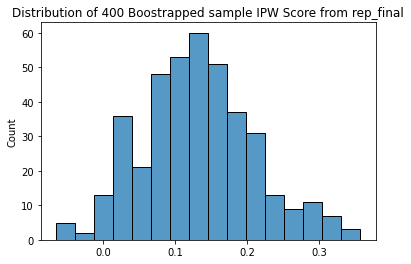

In [ ]:
sns.histplot(data = boot_rep);
plt.title('Distribution of 400 Boostrapped sample IPW Score from rep_final');

In [ ]:
confidence_interval_rep = [np.mean(boot_rep)-2*np.std(boot_rep), np.mean(boot_rep)+2*np.std(boot_rep)]
print('The 95% confidence interval is '+str(confidence_interval_rep))

The 95% confidence interval is [-0.02433512692418019, 0.28934025958856935]


### Democratic Dataset

In [ ]:
dem_columns = output_dem.columns[11:29].to_list()
for column in dem_columns:
    output_dem[column] = output_dem[column].replace({'Yes': 1, 'No': 0})

In [ ]:
dem_columns_final = ['State', 'Office Type'] + list(output_dem.columns[10:29])
dem_final = output_dem[dem_columns_final]
dem_final = pd.get_dummies(dem_final)
dem_final['treated'] = output_dem['treated']
dem_final['Final Election Result'] = output_dem['Final Election Result'].replace({'Won': 1, 'Lost': 0})
dem_final.head()

,Veteran?,LGBTQ?,Elected Official?,Self-Funder?,STEM?,Obama Alum?,Party Support?,Emily Endorsed?,Guns Sense Candidate?,Biden Endorsed?,...,State_WA,State_WV,Office Type_Governor,Office Type_Representative,Office Type_Senator,Race_No,Race_Nonwhite,Race_White,treated,Final Election Result
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,False,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,False,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,True,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,True,1
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,False,1


In [ ]:
Z_dem = dem_final['treated'].to_numpy()
X_dem = dem_final.iloc[:,0:61].to_numpy()
Y_dem = dem_final['Final Election Result'].to_numpy()

from sklearn.linear_model import LogisticRegression as LR
lr = LR(penalty='none', max_iter=1000, random_state=0)
e_hat_dem = lr.fit(X_dem, Z_dem)
estimate_treatment_effect(e_hat_dem, X_dem, Y_dem, Z_dem)

0.4567566581999129

In [ ]:
# Bootstrap for Confidence Interval
def bootstrap_dem(df, n = 400):
    #400 bootstrapped inverse propensity results
    np.random.seed(0)
    output = []
    for i in range(n):
        bootstrap = df.sample(frac = 1,replace=True)
        Z = bootstrap['treated'].to_numpy()
        Y = bootstrap['Final Election Result'].to_numpy()
        X = bootstrap.iloc[:,0:61].to_numpy()
        output.append(estimate_treatment_effect(e_hat_dem, X, Y, Z))
    return output

In [ ]:
boot_dem = bootstrap_dem(dem_final, 400)

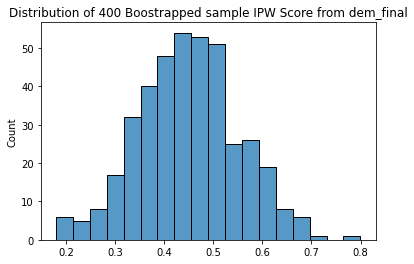

In [ ]:
sns.histplot(data = boot_dem);
plt.title('Distribution of 400 Boostrapped sample IPW Score from dem_final');

In [ ]:
confidence_interval_dem = [np.mean(boot_dem)-2*np.std(boot_dem), np.mean(boot_dem)+2*np.std(boot_dem)]
print('The 95% confidence interval is '+str(confidence_interval_dem))

The 95% confidence interval is [0.24733900326786032, 0.652397270722618]
